In [1]:
print("بسم الله الرحمن الرحیم")

بسم الله الرحمن الرحیم


In [2]:
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import os

In [3]:
import matplotlib.pyplot as plt

In [4]:
import cv2
from tqdm import tqdm

In [5]:
negPath = 'Dataset/MyDFMSD/TrainData/negative'
# neutPath = 'Dataset/Original/TrainData/neutral'

Aug_path = 'Dataset/AugmentedV3/'
os.makedirs(Aug_path, exist_ok=True)

In [6]:
import albumentations as A
from albumentations.pytorch import ToTensorV2

transform_t = A.Compose([
    # Spatial-level Transforms
    A.Resize(300,300),
    A.CenterCrop(224,224, p=0.5),
#     A.Resize(500,700),
# #     A.GridDistortion(p=0.3),
    A.HorizontalFlip(p=0.4),
    A.Rotate(limit=20, p=0.3),
#     A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.2, rotate_limit=45, p=0.5),
    #Pixel-level Transforms
#     A.OneOf([
#         A.Blur(blur_limit=3, p=0.1),
#         A.MedianBlur(blur_limit=3, p=0.1),
#     ], p=0.5),
#     A.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2, p=0.5),
#     A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5),
#     A.HueSaturationValue(hue_shift_limit=0.2, sat_shift_limit=0.2, p=0.5),
#     A.Normalize(mean=0, std=1),
#     ToTensorV2(),
])

(-0.5, 598.5, 629.5, -0.5)

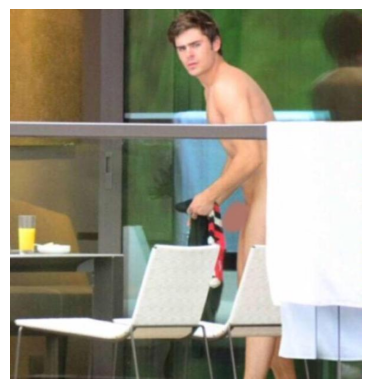

In [16]:
imageID = '2865.jpg'
sample_path = os.path.join(negPath, imageID)
# print(sample_path)
sample = cv2.imread(sample_path)
sample = cv2.cvtColor(sample, cv2.COLOR_BGR2RGB)
plt.imshow(sample)
plt.axis('off')

In [15]:
(sample.shape)

(630, 599, 3)

(224, 224, 3)


(-0.5, 223.5, 223.5, -0.5)

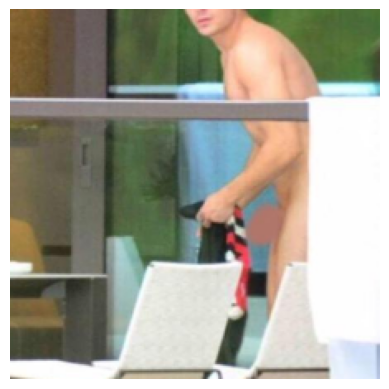

In [17]:
transformed_sample = transform_t(image=sample)['image']
print(transformed_sample.shape)
plt.imshow(transformed_sample)
plt.axis('off')

In [18]:
len(os.listdir(neutPath))

NameError: name 'neutPath' is not defined

## Augment Neutral Images

In [19]:
images = os.listdir(negPath)
dest_path = os.path.join(Aug_path, 'negative')
os.makedirs(dest_path, exist_ok=True)

for i in range(1):
    with tqdm(images) as imglist:
        for image in imglist:
            # 1.Read Image
            sample_path = os.path.join(negPath, image)
            sample = cv2.imread(sample_path)
            sample = cv2.cvtColor(sample, cv2.COLOR_BGR2RGB)

            # 2.Transform Image
            transformed_sample = transform_t(image=sample)['image']
            transformed_sample = cv2.cvtColor(transformed_sample, cv2.COLOR_BGR2RGB)
            
            # 3.Save Image
            outputFileName = f'{os.path.splitext(image)[0]}_aug{i}.jpg'
            outputPath = os.path.join(negPath, outputFileName)
            cv2.imwrite(outputPath, transformed_sample)

100%|██████████████████████████████████████████████████████████████████████████████| 4080/4080 [01:32<00:00, 44.13it/s]


## Augment Negative Images

In [9]:
images = os.listdir(negPath)
dest_path = os.path.join(Aug_path, 'negative')
os.makedirs(dest_path, exist_ok=True)

with tqdm(images) as imglist:
    for image in imglist:
        # 1.Read Image
        sample_path = os.path.join(negPath, image)
        sample = cv2.imread(sample_path)
        sample = cv2.cvtColor(sample, cv2.COLOR_BGR2RGB)
        
        # 2.Transform Image
        transformed_sample = transform_t(image=sample)['image']
        transformed_sample = cv2.cvtColor(transformed_sample, cv2.COLOR_BGR2RGB)
        
        # 3.Save Image
        outputFileName = f'{os.path.splitext(image)[0]}_aug0.jpg'
        outputPath = os.path.join(dest_path, outputFileName)
        cv2.imwrite(outputPath, transformed_sample)

100%|██████████████████████████████████████████████████████████████████████████████| 3841/3841 [01:41<00:00, 37.98it/s]


# Patch-wise Augmentation

In [5]:
import torchvision.transforms as transforms

# Define augmentations for patches
patch_augmentations = transforms.Compose([
    transforms.RandomHorizontalFlip(),
#     transforms.RandomRotation(10),
    transforms.RandomResizedCrop(25),
    # Add more augmentations as needed
])

In [6]:
import torch
import numpy as np

def apply_patch_augmentation(image, patch_size=32):
    width, height = image.size
    augmented_patches = []

    for i in range(0, height, patch_size):
        for j in range(0, width, patch_size):
            # Extract a patch
            patch = image.crop((j, i, j + patch_size, i + patch_size))
            
            # Apply augmentations to the patch
            augmented_patch = patch_augmentations(patch)
            
            # Append augmented patch
            augmented_patches.append(augmented_patch)

    # Reconstruct the image with augmented patches
    augmented_image = Image.new("RGB", (width, height))
    x = 0
    y = 0
    for patch in augmented_patches:
        augmented_image.paste(patch, (x, y))
        x += patch_size
        if x >= width:
            x = 0
            y += patch_size

    return augmented_image


(-0.5, 699.5, 499.5, -0.5)

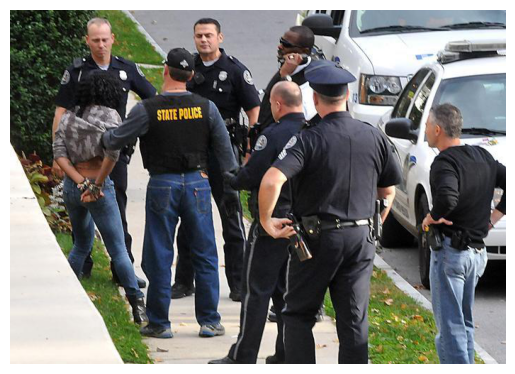

In [7]:
from PIL import Image

imageID = '_ 41.jpg'
sample_path = os.path.join(negPath, imageID)
# print(sample_path)
# sample = cv2.imread(sample_path)
# sample = cv2.cvtColor(sample, cv2.COLOR_BGR2RGB)
sample = Image.open(sample_path)
plt.imshow(sample)
plt.axis('off')

In [10]:
sample.size, type(sample)

((700, 500), PIL.JpegImagePlugin.JpegImageFile)

(700, 500) <class 'PIL.Image.Image'>


(-0.5, 699.5, 499.5, -0.5)

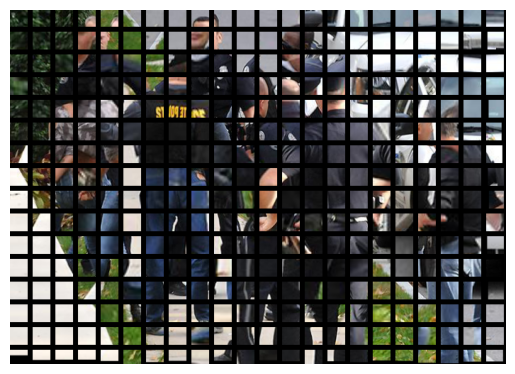

In [11]:
transformed_sample = apply_patch_augmentation(image=sample) #['image']
print(transformed_sample.size, type(transformed_sample))
plt.imshow(transformed_sample)
plt.axis('off')

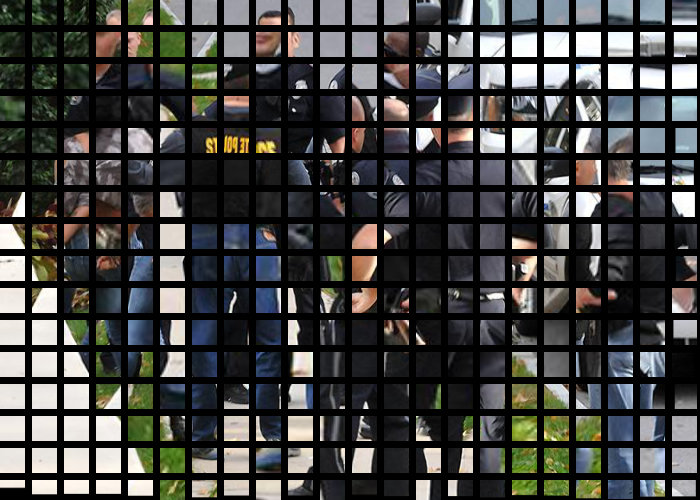

In [14]:
transformed_sample